In [59]:
import pandas as pd
import numpy as np
np.random.seed(12345)
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

This is the regression analysis for http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html.

# Read and Load Data

In [60]:
data_df = pd.read_csv('Elevators/elevators.data')
columns = open('Elevators/elevators.domain').readlines()
columns = [x.split(':')[0] for x in columns]
data_df.columns = columns

In [61]:
data_df.head()

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa,Goal
0,390,-45,-0.06,-0.07,-0.6,-12,11,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,0.0,0.0,-0.0008,0.034
1,68,6,0.11,0.15,0.6,-10,-9,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,0.0,0.0,-0.0010,0.033
2,-358,-12,-0.20,0.13,-0.3,-11,-7,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.032
3,-411,-19,-0.18,0.02,-0.5,-11,-3,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.030
4,-374,-29,-0.14,0.03,-0.8,-12,5,0.003,-0.3,-0.0008,-0.0010,-0.0010,-0.0010,0.0001,0.0,0.0,0.0,-0.0010,0.028


In [62]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 19 columns):
climbRate       8751 non-null int64
Sgz             8751 non-null int64
p               8751 non-null float64
q               8751 non-null float64
curRoll         8751 non-null float64
absRoll         8751 non-null int64
diffClb         8751 non-null int64
diffRollRate    8751 non-null float64
diffDiffClb     8751 non-null float64
SaTime1         8751 non-null float64
SaTime2         8751 non-null float64
SaTime3         8751 non-null float64
SaTime4         8751 non-null float64
diffSaTime1     8751 non-null float64
diffSaTime2     8751 non-null float64
diffSaTime3     8751 non-null float64
diffSaTime4     8751 non-null float64
Sa              8751 non-null float64
Goal            8751 non-null float64
dtypes: float64(15), int64(4)
memory usage: 1.3 MB


In [63]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
climbRate,8751.0,-1.096743e+01,277.654273,-993.0000,-199.0000,-30.0000,183.0000,973.0000
Sgz,8751.0,-1.249480e+01,26.239825,-97.0000,-29.0000,-13.0000,3.0000,94.0000
p,8751.0,-8.508742e-03,0.309551,-1.1500,-0.2300,0.0000,0.2200,0.9400
q,8751.0,5.306022e-02,0.115451,-0.4400,-0.0300,0.0500,0.1200,0.6900
curRoll,8751.0,9.164667e-02,0.949697,-3.0000,-0.6000,0.2000,0.7000,2.8000
absRoll,8751.0,-1.070095e+01,4.035307,-23.0000,-13.0000,-10.0000,-7.0000,-3.0000
diffClb,8751.0,-5.438236e-01,10.512376,-43.0000,-8.0000,0.0000,6.0000,44.0000
diffRollRate,8751.0,-9.917724e-04,0.012536,-0.0620,-0.0090,-0.0010,0.0070,0.0560
diffDiffClb,8751.0,-2.928808e-02,0.961306,-7.3000,-0.2000,-0.1000,0.1000,8.2000
SaTime1,8751.0,-7.463261e-04,0.000409,-0.0034,-0.0009,-0.0006,-0.0004,-0.0002


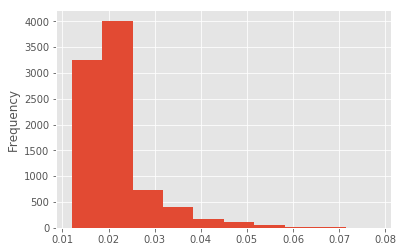

In [64]:
ax = data_df.loc[:, 'Goal'].plot(kind='hist')

# Correlation Plot

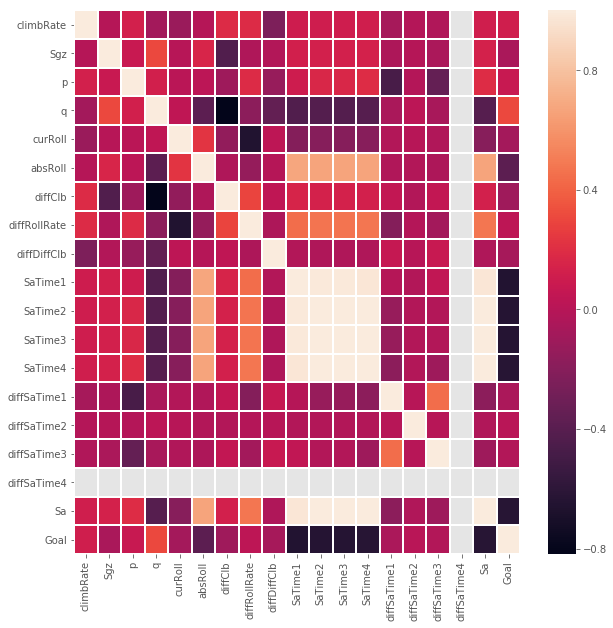

In [65]:
corrs = data_df.corr()
_, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(corrs, ax=ax, linewidths=1.0)

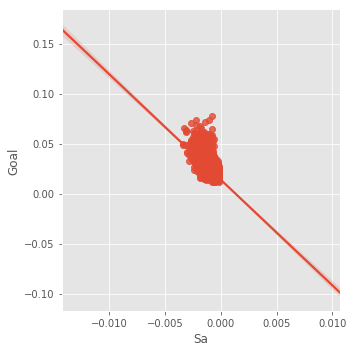

In [66]:
_ = sns.lmplot(x='Sa', y='Goal', data=data_df)

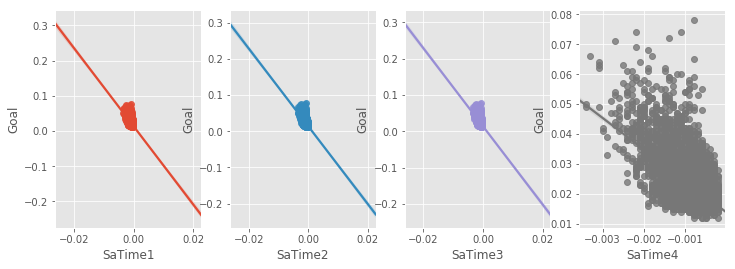

In [67]:
cols = ['SaTime1', 'SaTime2', 'SaTime3', 'SaTime4']

figure, ax = plt.subplots(1, 4, figsize=(12, 4))

for i, col in enumerate(cols):
    sns.regplot(x=col, y='Goal', data=data_df, ax=ax[i])

# PCA

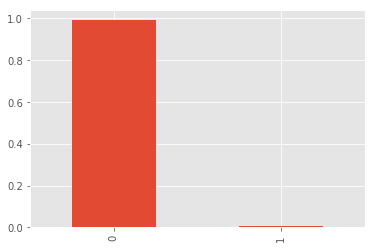

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=12345)
pca = pca.fit(data_df.drop('Goal', axis=1))

pca_s = pd.Series(pca.explained_variance_ratio_)
ax = pca_s.plot(kind='bar')

In [69]:
pca_data = pca.transform(data_df.drop('Goal', axis=1))
reduced_df = pd.DataFrame(data=pca_data, columns=['col_1', 'col_2'])
reduced_df.loc[:, 'Goal'] = data_df.Goal

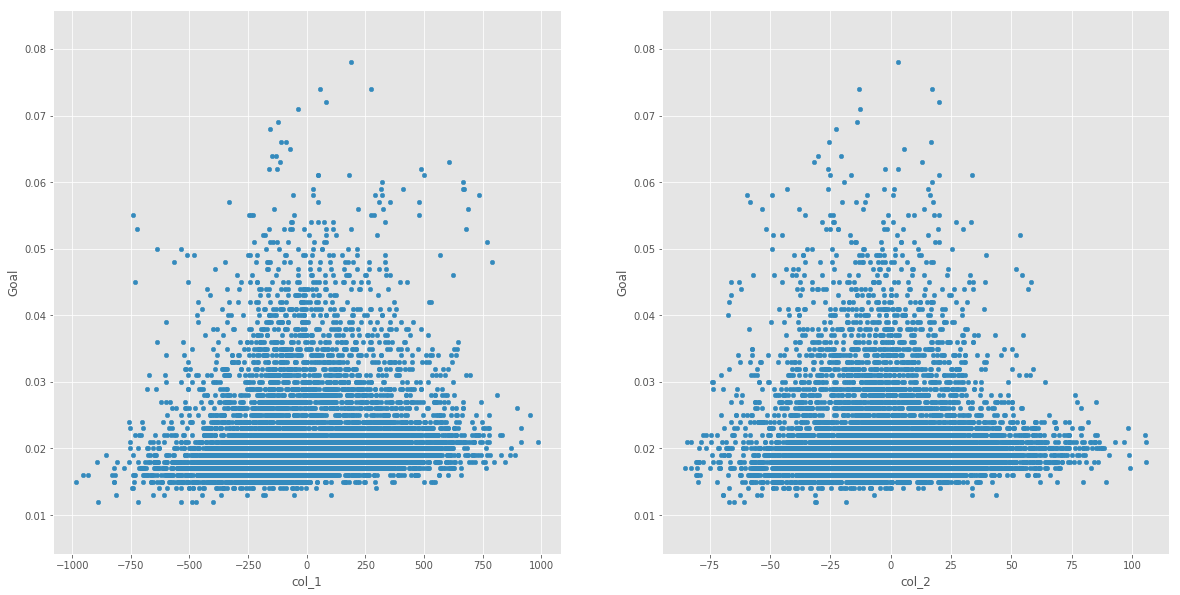

In [70]:
_, ax = plt.subplots(1, 2, figsize=(20, 10))
reduced_df.plot(x='col_1', y='Goal', kind='scatter', ax=ax[0])
reduced_df.plot(x='col_2', y='Goal', kind='scatter', ax=ax[1])

# Linear Regression

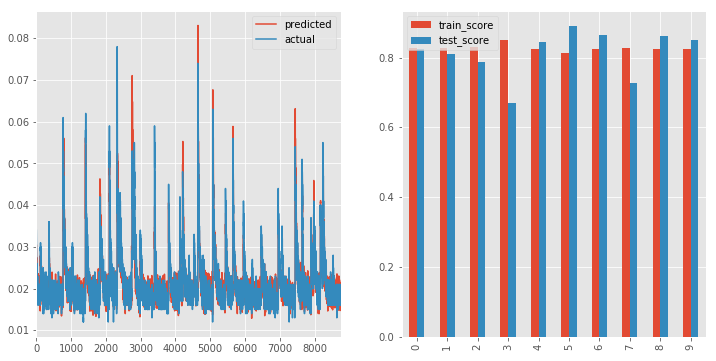

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, cross_val_predict, KFold

model = Pipeline([
    ('regressor', LinearRegression())
])

cv = KFold(n_splits=10, random_state=12345)
predictions = cross_val_predict(
    model,
    data_df.drop('Goal', axis=1).values,
    data_df.Goal.values,
    cv=cv
)

results = pd.DataFrame(np.column_stack([predictions, data_df.Goal.values]), columns=['predicted', 'actual'])
figure, ax = plt.subplots(1, 2, figsize=(12, 6))
_ = results.plot(ax=ax[0])

cv = KFold(n_splits=10, random_state=12345)
scores = cross_validate(
    model,
    data_df.drop('Goal', axis=1).values,
    data_df.Goal.values,
    cv=cv,
    scoring='r2',
    return_train_score=True
)

scores = pd.DataFrame.from_dict(scores)
_ = scores.loc[:, ['train_score', 'test_score']].plot(ax=ax[1], kind='bar')

In [73]:
scores.mean()

fit_time       0.003008
score_time     0.000432
test_score     0.813117
train_score    0.827505
dtype: float64

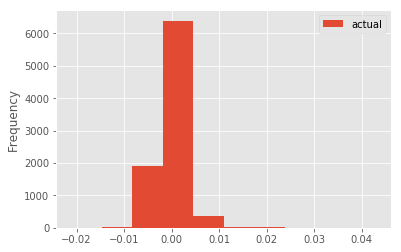

In [74]:
residuals = results.diff(axis=1)
residuals = residuals.drop('predicted', axis=1)
ax = residuals.plot(kind='hist')

# Deep Learning Regression Model`

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [85]:
def baseline_model(n_features=18, n=50, optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(n, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [115]:
model = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=20,verbose=1)

In [117]:
from sklearn.model_selection import cross_val_score, KFold
pipeline = Pipeline([
    ('standard', StandardScaler()),
    ('model', model)
])

pipeline = pipeline.fit(
    data_df.drop('Goal', axis=1).values,
    data_df.Goal.values
)

kfold = KFold(n_splits=10, random_state=12345)
results = cross_val_score(
    pipeline, 
    data_df.drop('Goal', axis=1).values,
    data_df.Goal.values,
    scoring='r2',
    cv=kfold)

Epoch 1/20
8751/8751 [==============================] - 3s 313us/step - loss: 2.8497e-04
Epoch 2/20
8751/8751 [==============================] - 2s 173us/step - loss: 1.3106e-04
Epoch 3/20
8751/8751 [==============================] - 2s 175us/step - loss: 2.4871e-04
Epoch 4/20
8751/8751 [==============================] - 2s 198us/step - loss: 1.0194e-04
Epoch 5/20
8751/8751 [==============================] - 1s 167us/step - loss: 1.5392e-05
Epoch 6/20
8751/8751 [==============================] - 2s 215us/step - loss: 9.5419e-06
Epoch 7/20
8751/8751 [==============================] - 2s 208us/step - loss: 1.3920e-05
Epoch 8/20
8751/8751 [==============================] - 2s 195us/step - loss: 3.9265e-05
Epoch 9/20
8751/8751 [==============================] - 2s 186us/step - loss: 6.4209e-05
Epoch 10/20
8751/8751 [==============================] - 2s 214us/step - loss: 6.6130e-05
Epoch 11/20
8751/8751 [==============================] - 2s 174us/step - loss: 8.4085e-06
Epoch 12/20
8751/87

7876/7876 [==============================] - 1s 156us/step - loss: 5.2968e-06
Epoch 11/20
7876/7876 [==============================] - 2s 223us/step - loss: 5.1300e-06
Epoch 12/20
7876/7876 [==============================] - 1s 161us/step - loss: 4.5983e-06
Epoch 13/20
7876/7876 [==============================] - 2s 224us/step - loss: 4.7856e-06
Epoch 14/20
7876/7876 [==============================] - 2s 223us/step - loss: 4.9273e-06
Epoch 15/20
7876/7876 [==============================] - 2s 236us/step - loss: 4.6843e-06
Epoch 16/20
7876/7876 [==============================] - 2s 215us/step - loss: 4.9018e-06
Epoch 17/20
7876/7876 [==============================] - 3s 323us/step - loss: 4.9842e-06
Epoch 18/20
7876/7876 [==============================] - 2s 211us/step - loss: 4.4440e-06
Epoch 19/20
7876/7876 [==============================] - 2s 202us/step - loss: 4.1607e-06
Epoch 20/20
875/875 [==============================] - 1s 670us/step
Epoch 1/20
7876/7876 [=====================

7876/7876 [==============================] - 1s 174us/step - loss: 2.8124e-05
Epoch 20/20
875/875 [==============================] - 1s 618us/step
Epoch 1/20
7876/7876 [==============================] - 3s 404us/step - loss: 4.8908e-04
Epoch 2/20
7876/7876 [==============================] - 2s 279us/step - loss: 2.8471e-05
Epoch 3/20
7876/7876 [==============================] - 2s 278us/step - loss: 2.5925e-05
Epoch 4/20
7876/7876 [==============================] - 1s 172us/step - loss: 2.1774e-05
Epoch 5/20
7876/7876 [==============================] - 2s 205us/step - loss: 3.0087e-05
Epoch 6/20
7876/7876 [==============================] - 2s 246us/step - loss: 6.3274e-05
Epoch 7/20
7876/7876 [==============================] - 2s 211us/step - loss: 1.1646e-04
Epoch 8/20
7876/7876 [==============================] - 2s 196us/step - loss: 3.0360e-05
Epoch 9/20
7876/7876 [==============================] - 1s 189us/step - loss: 1.5012e-05
Epoch 10/20
7876/7876 [=============================

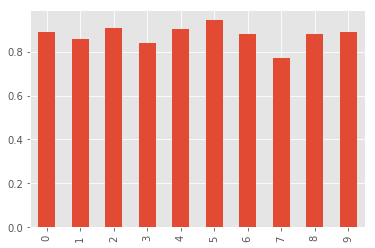

In [118]:
pd.Series(results).abs().plot(kind='bar')

In [120]:
results.mean()

0.8753551161663842